In [1]:
%matplotlib notebook

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

def extract(data):
    ret = np.zeros([5], dtype=np.float64)
    ret[:] = np.nan
    skip = True
    for line in data.splitlines():
        line = line.lstrip()
        if line.startswith('Command being timed'):
            skip = False
            continue
        if skip:
            continue
        k,v = line.split(': ',1)
        if k.startswith('User time'):
            ret[0] = float(v)
        elif k.startswith('System time'):
            ret[1] = float(v)
        elif k.startswith('Percent of CPU'):
            ret[2] = float(v[:-1])
        elif k.startswith('Elapsed (wall clock)'):
            v = v.split(':')
            ret[3] = float(v[0])*60+float(v[1])
        elif k.startswith('Maximum resident'):
            ret[4] = float(v)/4096/1024
            return ret

In [2]:
p = Path('.')
vals = np.zeros([3, 10, 10, 5], dtype=float)
performances = p.glob('*/*/performance')
for performance in performances:
    if performance.parts[0] == 'go-flows.channel-cpu':
        i = 0
    elif performance.parts[0] == 'go-flows.old-cpu':
        i = 1
    elif performance.parts[0] == 'go-flows.ring-cpu':
        i = 2
    j, k = performance.parts[1].split('-')
    j = int(j)-1
    k = int(k)
    vals[i,j,k,:] = extract(performance.read_text())
means = np.nanmean(vals,2)
dev = np.nanstd(vals, 2)

<IPython.core.display.Javascript object>


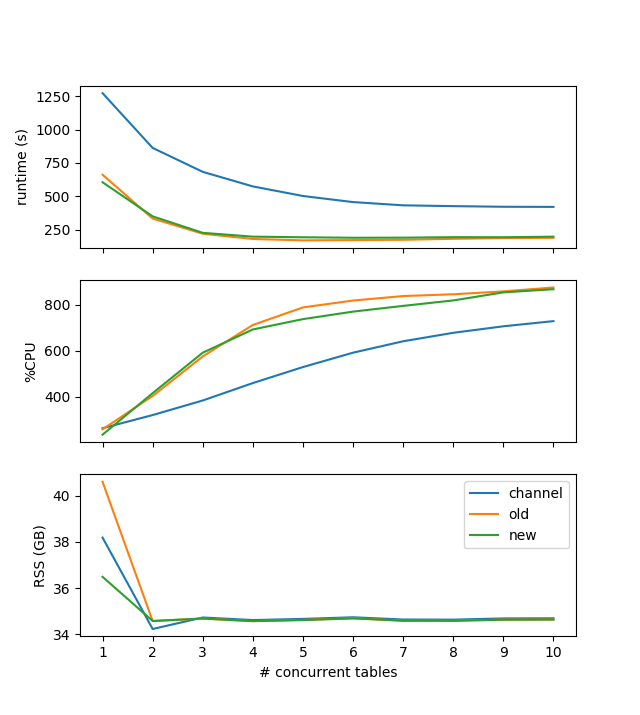

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
plt.xticks(range(1,11))
t = np.ones([3,1]) @ np.array([range(1, 11)])
lines = ax1.plot(t.T, means[:,:,3].T)
plt.legend(lines, ['channel', 'old', 'new'])
lines = ax3.plot(t.T, means[:,:,4].T)
#ax2 = ax1.twinx()
lines = ax2.plot(t.T, means[:,:,2].T)
ax2.set_ylabel('%CPU')
ax3.set_xlabel('# concurrent tables')
ax3.set_ylabel('RSS (GB)')
ax1.set_ylabel('runtime (s)')
